In [1]:
from Chemometrics.basic import *
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'

In [3]:
# load the data:X,y
with open('./洋河典型.csv') as f:
    df =pd.read_csv(f,delimiter='\t')
d = df.dropna(axis=1,how='all').dropna(axis=0)
from sklearn.preprocessing import LabelEncoder
y = d['分类名称']
X = d.loc[:,'1':]
psave(dict(X=X,y=y),'./data/洋河典型.p')

In [33]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,stratify=y)

In [40]:
# build pipeline
pipe_steps = [('preprocessing',None),
              ('f_select',None),
              ('clf',SVC())]
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from shutil import rmtree
cachedir = mkdtemp()
pipe = Pipeline(pipe_steps,memory=cachedir)

In [41]:
# build parameter grid
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import f_classif,mutual_info_classif,chi2,SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

np.random.seed(1)
param_grid = dict(preprocessing = [None,StandardScaler(),MinMaxScaler()],
                  f_select = [SelectKBest(f_classif,k=10)],
                  f_select__k = range(5,30),
                  f_select__score_func = [f_classif,mutual_info_classif],
                  clf = [DecisionTreeClassifier(class_weight='balanced'),
                         RandomForestClassifier(class_weight='balanced')],
                  clf__min_samples_leaf = range(2,5))

In [42]:
#gridsearch CV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe,param_grid=param_grid,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='C:\\Users\\litao\\AppData\\Local\\Temp\\tmp6zeq0q13',
     steps=[('preprocessing', None), ('f_select', None), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'preprocessing': [None, StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1))], 'f_select': [SelectKBest(k=5,
      score_func=<function mutual_info_classif at 0x000001B617802A60>)], 'f_select__k': range(5, 30), 'f_select__score_func': [<... random_state=None,
            verbose=0, warm_start=False)], 'clf__min_samples_leaf': range(2, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
#plot_tree(grid_search.best_estimator_,X_train.columns)

# model evaluation
- train set

In [49]:
# best model performance
#train set
best_model = grid_search.best_estimator_
grid_search.best_estimator_

Pipeline(memory='C:\\Users\\litao\\AppData\\Local\\Temp\\tmp6zeq0q13',
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('f_select', SelectKBest(k=5,
      score_func=<function mutual_info_classif at 0x000001B617802A60>)), ('clf', DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_feature...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

- test set

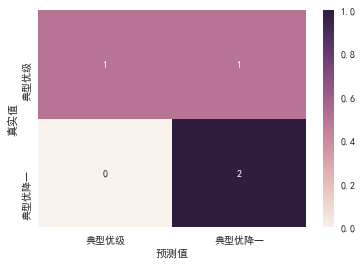

In [53]:
test_preds = best_model.predict(X_test)
cm = confusion_matrix(y_test,test_preds)
plot_ConfusionMatrix(cm,best_model.classes_)

In [56]:
data = dict(best_model=best_model,
            description='洋河酒典型酒样，pipeline gridsearchCV优化的最好结果')
psave(data=data,file_name='洋河典型酒样bestmodel2018-2-8.p')